In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict
import matplotlib.ticker as mtick

In [2]:
data = pd.read_csv('backpicks_single_season.csv')

In [3]:
seasons = []
teams = []
for item in data["Yr / Tm"].tolist():
    seasons.append(item.split(" ")[0])
    teams.append(item.split(" ")[1])

In [4]:
data.loc[:, 'Season'] = seasons
data.loc[:, 'Team'] = teams

In [5]:
interesting_seasons = ['1980-81',
 '1981-82',
 '1982-83',
 '1983-84',
 '1984-85',
 '1985-86',
 '1986-87',
 '1987-88',
 '1988-89',
 '1989-90',
 '1990-91',
 '1991-92',
 '1992-93',
 '1993-94',
 '1994-95',
 '1995-96',
 '1996-97',
 '1997-98',
 '1998-99',
 '1999-00',
 '2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',]

In [6]:
interesting_data = data.loc[data.Season.isin(interesting_seasons)]

In [7]:
plt.style.use('fivethirtyeight')

In [8]:
interesting_data.iloc[0]

Unnamed: 0                 0
Player            A.C. Green
Yr / Tm          1986-87 LAL
MP                      2240
G                         79
BPM                        2
OBPM                     1.1
AuPM/g                   NaN
Scaled APM/g             NaN
Scaled DAPM/g            NaN
ScoreVal                 0.7
PlayVal                 -0.9
Load                    19.3
IA Pts/75               13.7
rTS%                     6.1
Box Creation             0.5
Passer rating            2.6
Spacing                   85
FTA / 100                5.9
Team SRS                 8.3
Team Ortg                7.3
Team Drtg               -1.8
PS                       NaN
PS MP                    505
PS AuPM/g                NaN
PS BPM                   2.4
PS OBPM                  1.7
PS ScoreVal              1.4
PS PlayVal                -1
PS Load                 18.5
PS aPts 75              14.8
PS rTS%                  7.7
PS Box OC                0.3
PS Pass rtg              2.3
PS FTA/100    

BPM = Backpicks Box plus-minus model.

OBPM = Backpicks Offensive Box plus-minus model.

AuPM/g = Augmented plus-minus, a plus-minus/box score hybrid that approximates adjusted plus-minus. [since 1994, since 1977 for 76ers]

Scaled APM/g = Scaled adjusted plus-minus value per game [since 1997]

Scaled DAPM/g = Scaled defensive adjusted plus-minus per game [since 1997]

Team Ortg = The relative offensive rating of a player’s team in a given year.

ScoreVal = Scoring value, an estimate of a player’s points per 100 impact from scoring only.

PlayVal = Playmaking value, an estimate of a player’s points per 100 impact from playmaking only.

Load = offensive load, an estimate of the number of a player a player is “directly involved” in on offense every 100 
possessions.

IA Pts/75 = Inflation-adjusted points per 75 possessions (adjusted to a 110 league average).

rTS% = relative True Shooting percentage (true shooting compared to opponent/league average).

Box Creation = An estimate of shots created for teammates per 100 possessions.

Passer Rating = An estimate of a player’s passing ability on (approximately) a 1-10 scale.

Spacing = A basic estimate of player spacing using.

PS = postseason values.

In [46]:
percentiles = interesting_data.groupby('Season')['Box Creation'].rank(pct=True)

In [47]:
interesting_data.loc[:, 'Box Creation Percentiles'] = percentiles

In [48]:
interesting_data.loc[:, 'Box Creation Percentiles'] = interesting_data['Box Creation Percentiles'] * 100

In [50]:
interesting_data.columns

Index(['Unnamed: 0', 'Player', 'Yr / Tm', 'MP', 'G', 'BPM', 'OBPM', 'AuPM/g',
       'Scaled APM/g', 'Scaled DAPM/g', 'ScoreVal', 'PlayVal', 'Load',
       'IA Pts/75', 'rTS%', 'Box Creation', 'Passer rating', 'Spacing',
       'FTA / 100', 'Team SRS', 'Team Ortg', 'Team Drtg', 'PS', 'PS MP',
       'PS AuPM/g', 'PS BPM', 'PS OBPM', 'PS ScoreVal', 'PS PlayVal',
       'PS Load', 'PS aPts 75', 'PS rTS%', 'PS Box OC', 'PS Pass rtg',
       'PS FTA/100', 'PS Tm Ortg', 'PS Tm Drtg', 'Season', 'Team',
       'Box Creation Percentiles'],
      dtype='object')

In [51]:
penny_data = interesting_data.loc[interesting_data.Player.str.contains('Anfernee Hardaway')]

In [52]:
other = interesting_data.loc[~interesting_data.Player.str.contains('Anfernee Hardaway')]

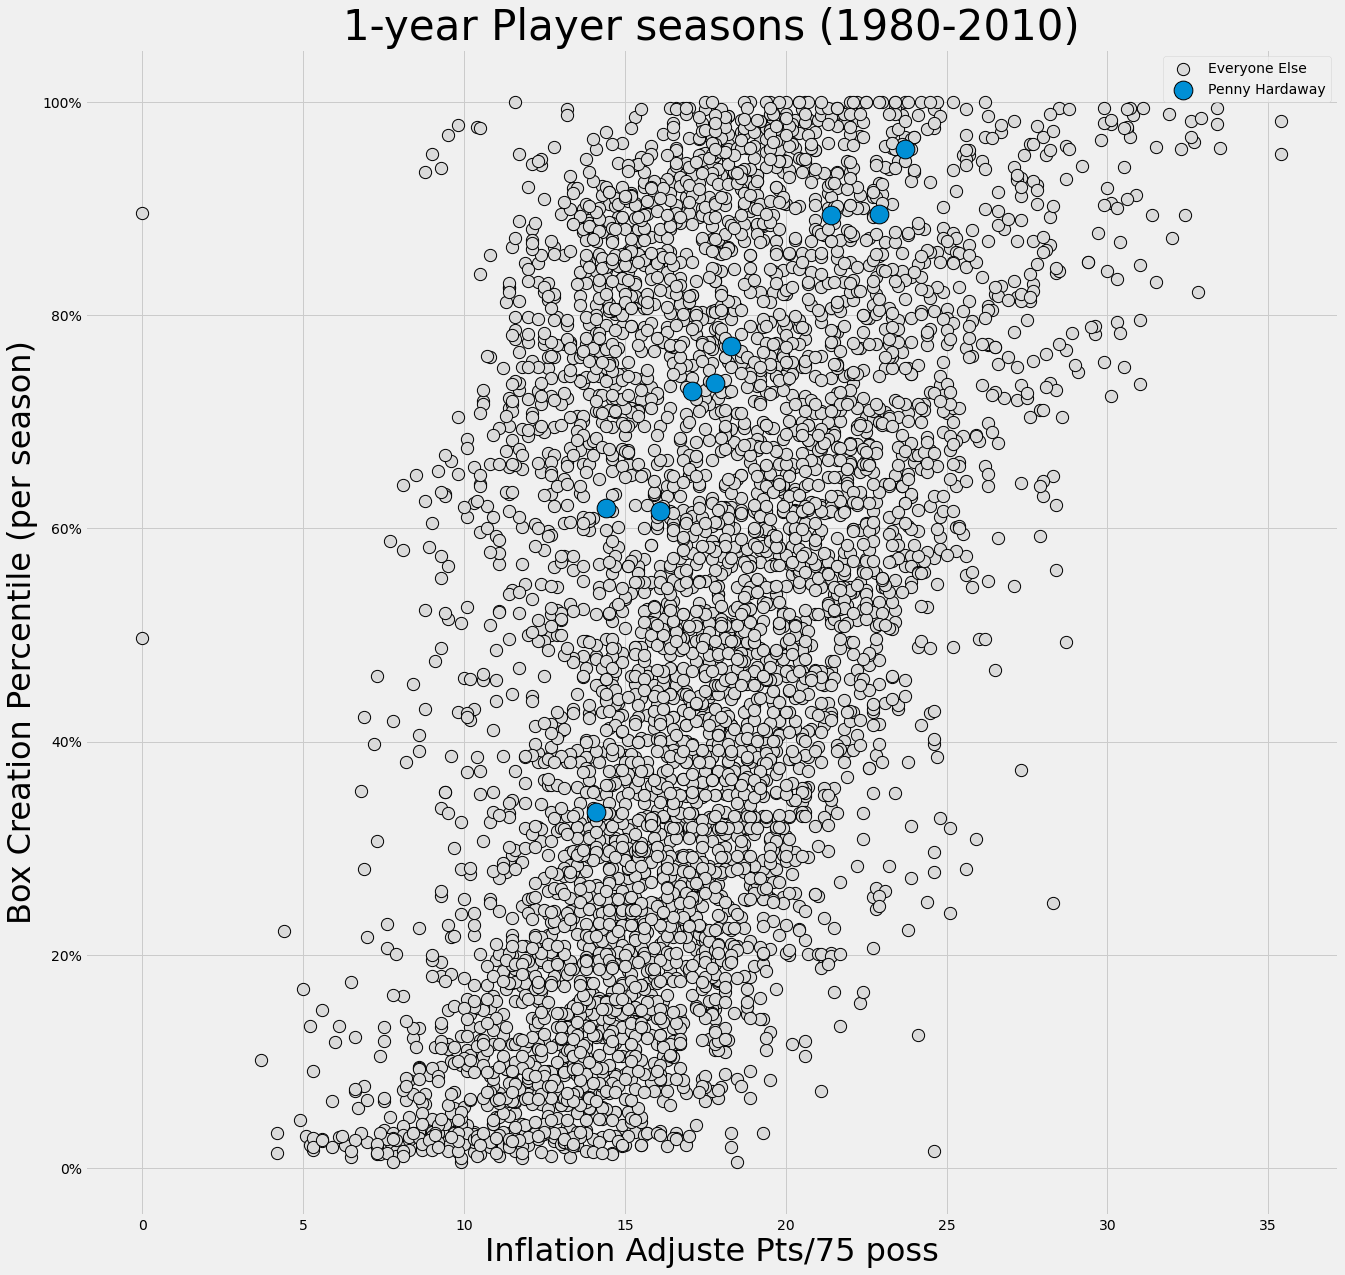

In [54]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other['IA Pts/75'], y=other['Box Creation Percentiles'], s=150, color='#DADADA', lw=1, edgecolors='black', label='Everyone Else')
ax.scatter(x=penny_data['IA Pts/75'], y=penny_data['Box Creation Percentiles'], s=350, lw=1, edgecolors='black', label='Penny Hardaway')
#ax.scatter(x=merged_df.ppg_battier, y=merged_df.ts_pct_battier, s=350, lw=1, edgecolors='black', label='Vs Battier')
ax.set_xlabel('Inflation Adjuste Pts/75 poss', size=32)
ax.set_ylabel('Box Creation Percentile (per season)', size=32)
ax.set_title("1-year Player seasons (1980-2010)", size=42)
#ax.set_yticklabels(range(-20, 120, 20))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend()

Kidd, Nash, Magic, Thomas, and Stockton

In [66]:
target_players = [
    'Anfernee Hardaway',
    'Jason Kidd',
    'Steve Nash',
    'Magic Johnson',
    'Isiah Thomas',
    'John Stockton',
]

In [68]:
target_data = interesting_data.loc[interesting_data.Player.isin(target_players)]

In [70]:
target_data.to_csv('target_player_data.csv')

In [62]:
penny_data = target_data.loc[target_data.Player.str.contains('Anfernee Hardaway')]

other = target_data.loc[~target_data.Player.str.contains('Anfernee Hardaway')]

In [74]:
target_data.loc[target_data.Player == 'Magic Johnson'].sort_values(by='IA Pts/75').iloc[-1]

Unnamed: 0                           5729
Player                      Magic Johnson
Yr / Tm                       1986-87 LAL
MP                                   2904
G                                      80
BPM                                   8.1
OBPM                                  6.1
AuPM/g                                NaN
Scaled APM/g                          NaN
Scaled DAPM/g                         NaN
ScoreVal                              1.2
PlayVal                               2.2
Load                                 47.7
IA Pts/75                            23.7
rTS%                                  6.4
Box Creation                           11
Passer rating                         9.5
Spacing                                91
FTA / 100                            10.3
Team SRS                              8.3
Team Ortg                             7.3
Team Drtg                            -1.8
PS                                    NaN
PS MP                             

In [76]:
penny_data.sort_values(by='Box Creation Percentiles', ascending=False).iloc[0]

Unnamed: 0                                356
Player                      Anfernee Hardaway
Yr / Tm                           1995-96 ORL
MP                                       3015
G                                          82
BPM                                       5.7
OBPM                                      4.7
AuPM/g                                    5.6
Scaled APM/g                              NaN
Scaled DAPM/g                             NaN
ScoreVal                                  1.1
PlayVal                                   1.4
Load                                     44.1
IA Pts/75                                23.7
rTS%                                      6.3
Box Creation                              8.1
Passer rating                             7.9
Spacing                                   108
FTA / 100                                10.1
Team SRS                                  5.4
Team Ortg                                 5.2
Team Drtg                         

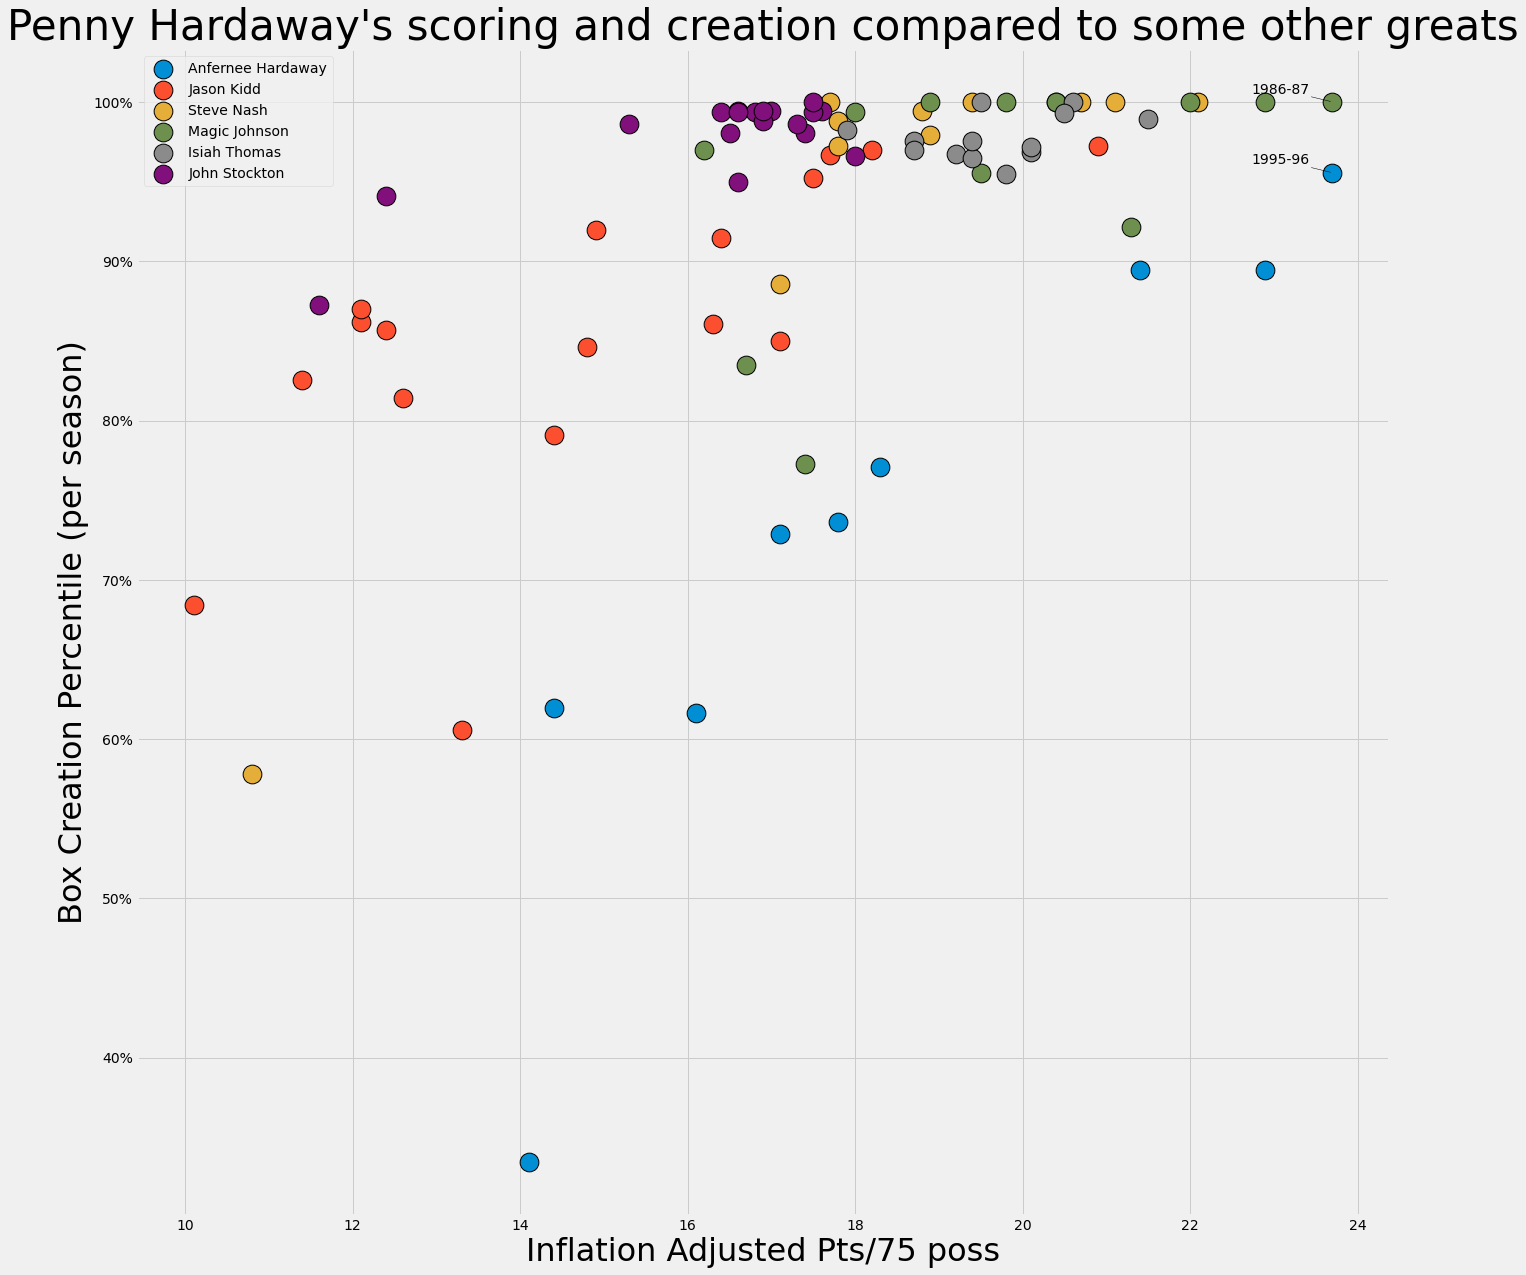

In [81]:


fig, ax = plt.subplots(figsize=(20, 20))

for target_player in target_players:
    cur_data = target_data.loc[target_data.Player == target_player]
    ax.scatter(x=cur_data['IA Pts/75'], y=cur_data['Box Creation Percentiles'], s=350, lw=1, edgecolors='black', label=target_player)
#ax.scatter(x=merged_df.ppg_battier, y=merged_df.ts_pct_battier, s=350, lw=1, edgecolors='black', label='Vs Battier')
ax.set_xlabel('Inflation Adjusted Pts/75 poss', size=32)
ax.set_ylabel('Box Creation Percentile (per season)', size=32)
ax.set_title("Penny Hardaway's scoring and creation compared to some other greats", size=42)
#ax.set_yticklabels(range(-20, 120, 20))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

magic_top_season = target_data.loc[target_data.Player == 'Magic Johnson'].sort_values(by='IA Pts/75').iloc[-1]
penny_top_season = penny_data.sort_values(by='Box Creation Percentiles', ascending=False).iloc[0]
texts = [
    ax.text(x=penny_top_season['IA Pts/75'], y=penny_top_season['Box Creation Percentiles'], s=penny_top_season.Season),
    ax.text(x=magic_top_season['IA Pts/75'], y=magic_top_season['Box Creation Percentiles'], s=magic_top_season.Season),
]
adjust_text(texts, expand_points=(1.8, 1.8), arrowprops={'arrowstyle': '-', 'color': 'black'})
ax.legend()